In [105]:
import pandas as pd
import statistics
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold ,RepeatedKFold,train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import shapiro,pearsonr
from scipy import stats
import scipy as sp
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing,metrics,datasets, linear_model,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import linear_model,tree

In [106]:
sheets=pd.read_excel('stock portfolio\\sda_data.xlsx',sheet_name=['all period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df.keys()
df.describe()


,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.580151,0.576170,0.426494,0.391749,0.566984,0.547899
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.133358,0.137047,0.118178,0.136653,0.112803,0.159468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525811,0.519093,0.358600,0.297324,0.520000,0.411765
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.598516,0.587148,0.403418,0.368958,0.560000,0.552941
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.679636,0.669294,0.470571,0.457749,0.640000,0.694118
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [107]:
df.isnull().values.any()

False

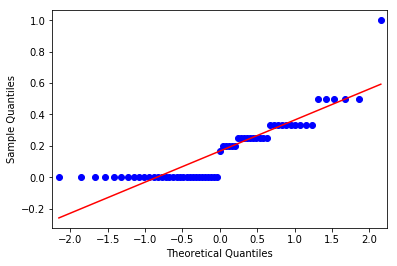

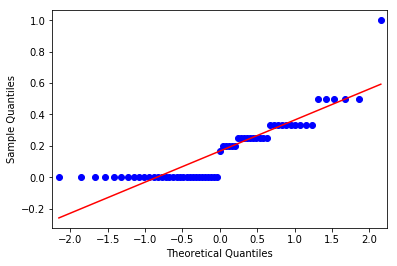

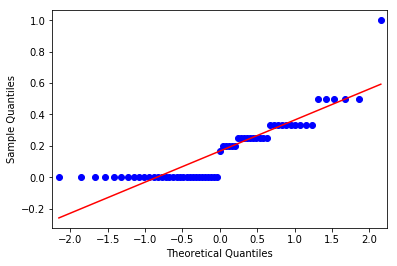

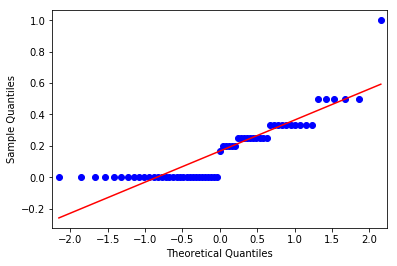

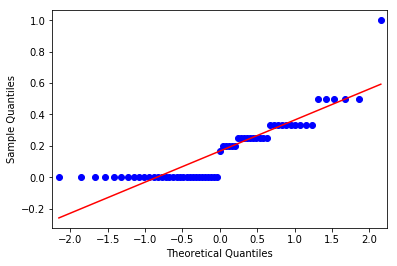

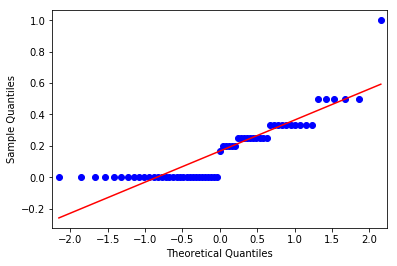

In [108]:
X=df.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
Y = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
for each in X.keys():
    
    qqplot(X[each],line='s')
    plt.show()

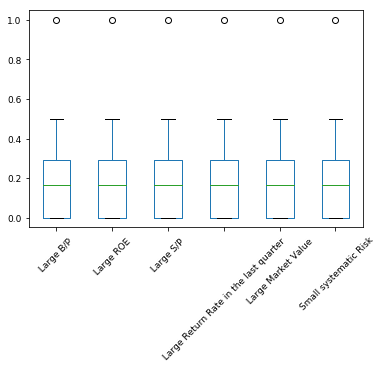

In [109]:
X=df.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
Y=df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk",'Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate'],axis=1)
boxplot = X.boxplot(grid=False, rot=45, fontsize=9)

In [110]:
z = np.abs(stats.zscore(df))
df_o = df[(z < 3).all(axis=1)]
print(df_o.shape)

(57, 12)


In [111]:
correlation=df_o.corr()
print(correlation)

                                          Large B/P    Large ROE   \
 Large B/P                                  1.000000    -0.200000   
 Large ROE                                 -0.200000     1.000000   
 Large S/P                                 -0.200000    -0.200000   
 Large Return Rate in the last quarter     -0.200000    -0.200000   
 Large Market Value                        -0.200000    -0.200000   
 Small systematic Risk                     -0.200000    -0.200000   
Annual Return                               0.212125     0.472679   
Excess Return                               0.255376     0.453642   
Systematic Risk                            -0.055462    -0.248139   
Total Risk                                  0.240293    -0.346928   
Abs. Win Rate                               0.419245     0.317428   
Rel. Win Rate                              -0.127445     0.738607   

                                          Large S/P   \
 Large B/P                                 -0.

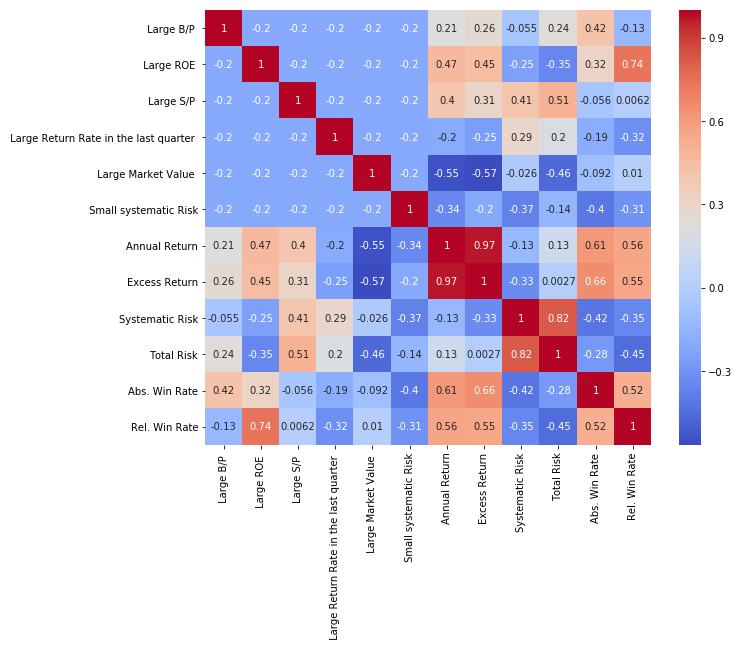

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [113]:
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2,random_state=1)



model for Annual Return evaluation parameter
The linear model is: Y = -12.438 + 13.148*large b/p + 13.355*large ROE + 13.286*large s/p+ 12.912*large return rates+ 12.719*large market sales+ 12.817*small system risk
Variance score: 0.7019488999882291


model for Excess Return evaluation parameter
The linear model is: Y = -16.664 + 17.401*large b/p + 17.568*large ROE + 17.455*large s/p+ 17.114*large return rates+ 16.927*large market sales+ 17.128*small system risk
Variance score: 0.6717835969280928


model for Systematic Risk evaluation parameter
The linear model is: Y = 14.279 + -13.893*large b/p + -13.983*large ROE + -13.669*large s/p+ -13.757*large return rates+ -13.875*large market sales+ -14.056*small system risk
Variance score: 0.08145662584081781


model for Total Risk evaluation parameter
The linear model is: Y = 7.0886 + -6.5722*large b/p + -6.8841*large ROE + -6.431*large s/p+ -6.6196*large return rates+ -6.9572*large market sales+ -6.8111*small system risk
Variance score: 0.

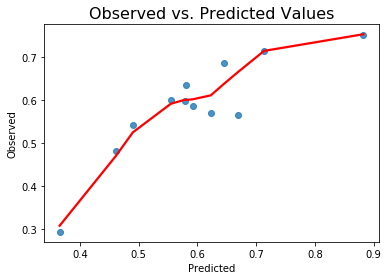

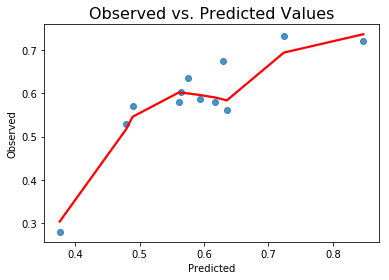

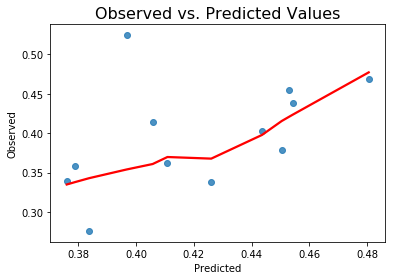

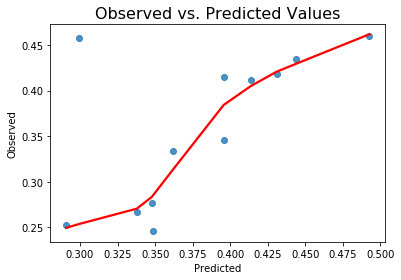

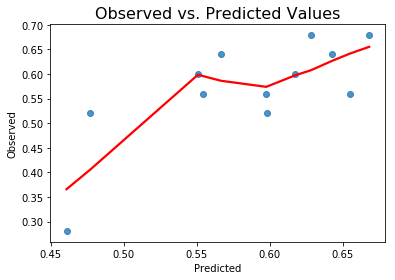

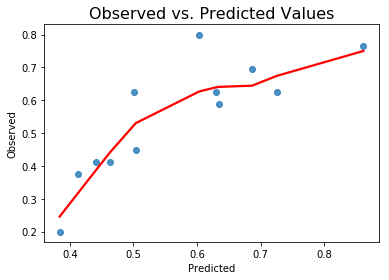

In [114]:
Y_o_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],index=y_o_test.index.values) 
for y in y_o_train.keys():
    reg = linear_model.LinearRegression() 
    reg.fit(x_o_train, y_o_train[y])
    print("\n")
    print("model for",y,'evaluation parameter')
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))
    print('Variance score: {}'.format(reg.score(x_o_test, y_o_test[y]))) 
    y_o_pred = reg.predict(x_o_test)
    Y_o_pred[y]= y_o_pred
    fig, ax = plt.subplots(1,1)
    sns.regplot(x=y_o_pred, y=y_o_test[y], lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Observed vs. Predicted Values', fontsize=16)
    ax.set(xlabel='Predicted', ylabel='Observed')

In [115]:
for y in y_o.keys():
    model_ols = sm.OLS(y_o_train[y],x_o_train
                      ).fit()
    print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:          Annual Return   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              644.1
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                    2.13e-37
Time:                        10:53:22   Log-Likelihood:                          62.057
No. Observations:                  45   AIC:                                     -112.1
Df Residuals:                      39   BIC:                                     -101.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

In [116]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_squared_error(y_true,y_pred):
    return  metrics.mean_squared_error(y_true, y_pred)

def goodness(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mse
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [statistics.mean(ys_orig) for y in ys_orig]
    squared_error_regr = mean_squared_error(ys_orig, ys_line)
    squared_error_y_mean = mean_squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

c:\users\neeharika\appdata\local\programs\python\python37\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


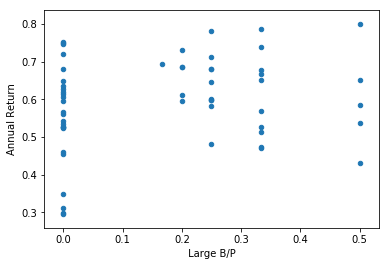

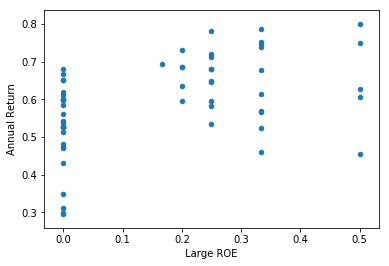

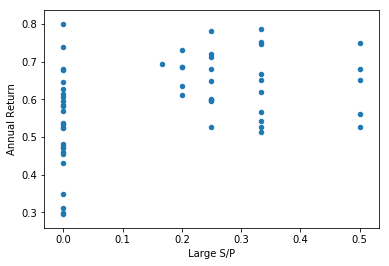

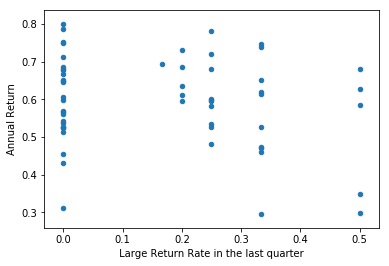

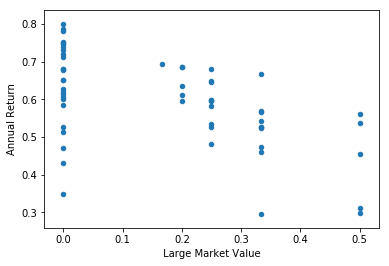

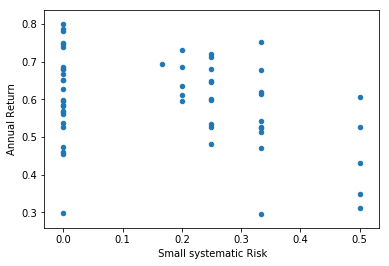

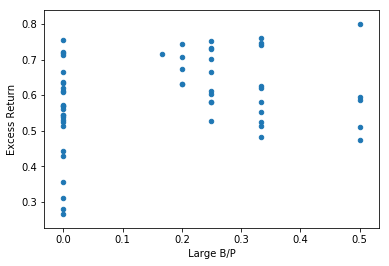

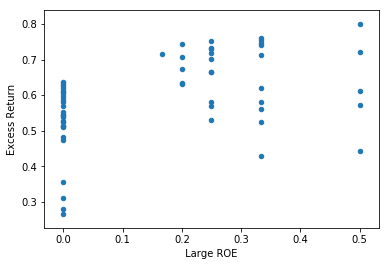

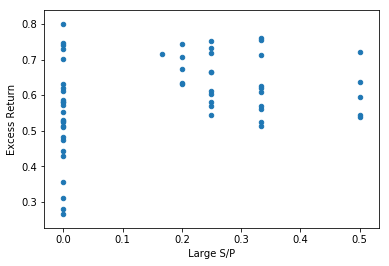

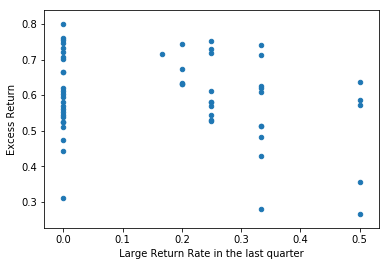

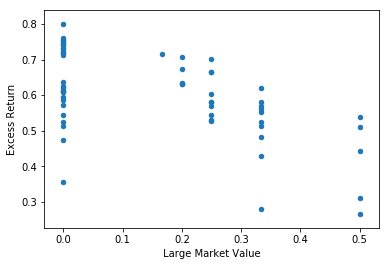

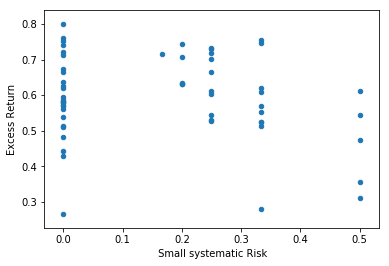

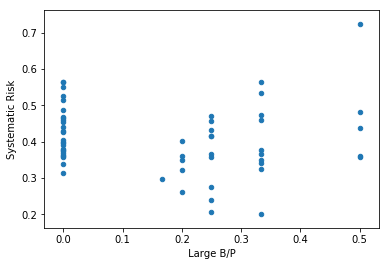

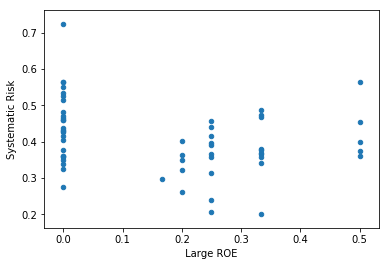

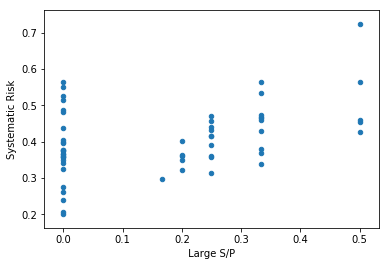

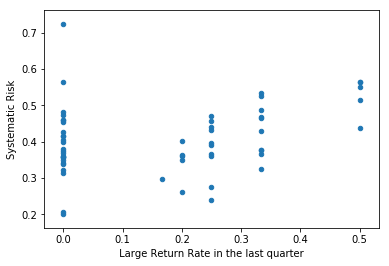

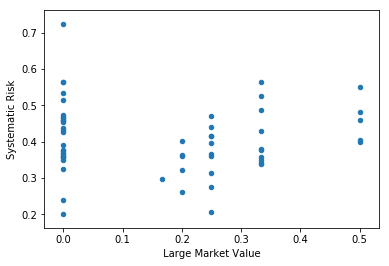

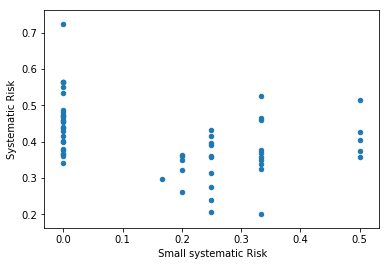

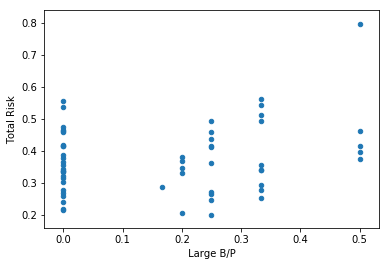

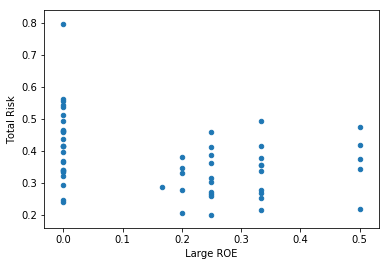

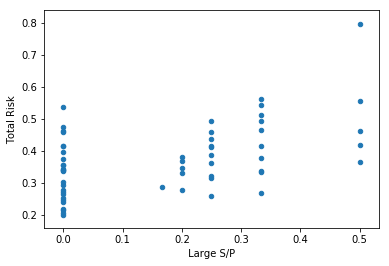

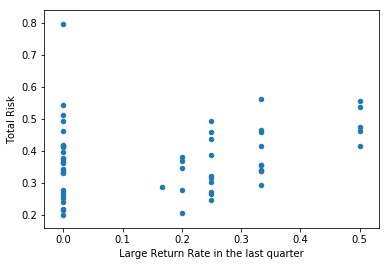

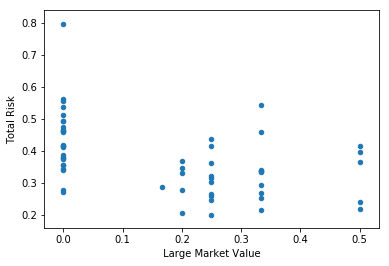

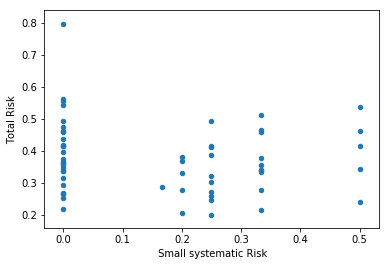

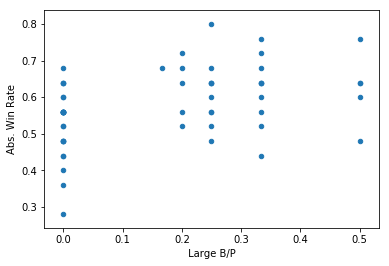

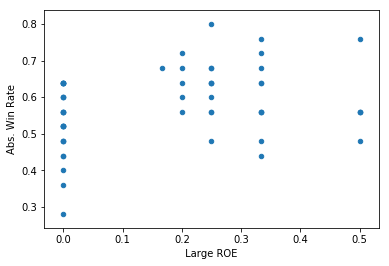

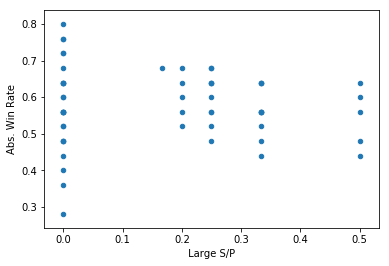

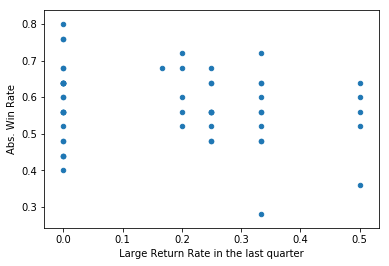

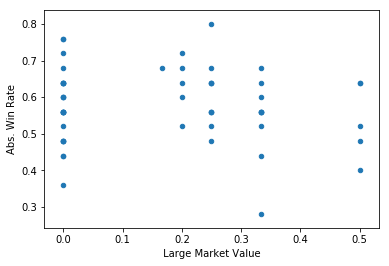

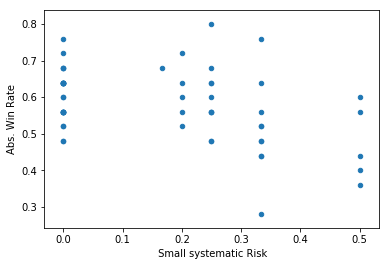

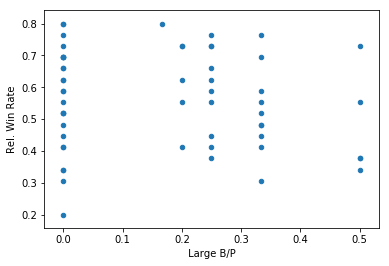

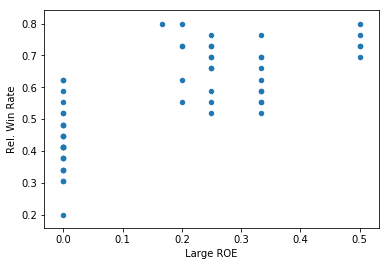

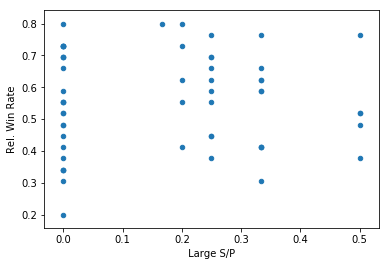

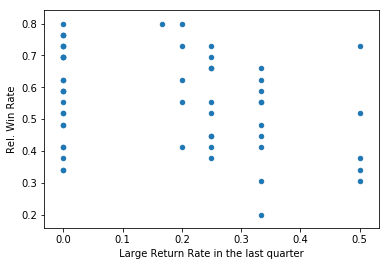

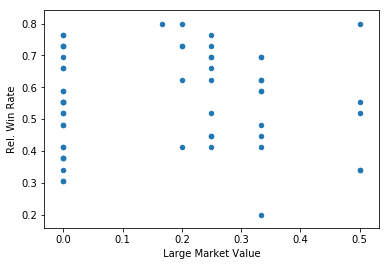

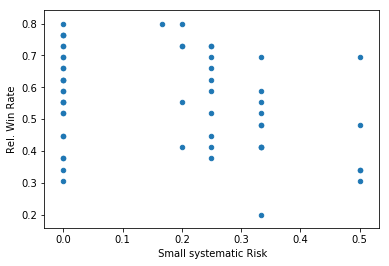

In [117]:
for y in y_o.keys():
    for x in x_o.keys():
        colors = (0,0,0)
        area = np.pi*3
        df_o.plot.scatter(x=x, y=y)

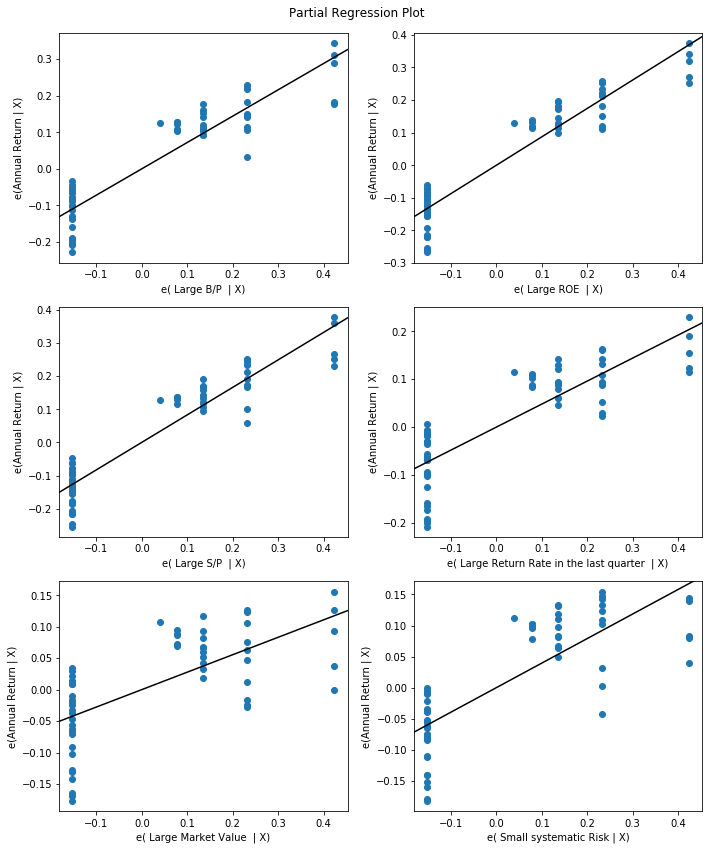

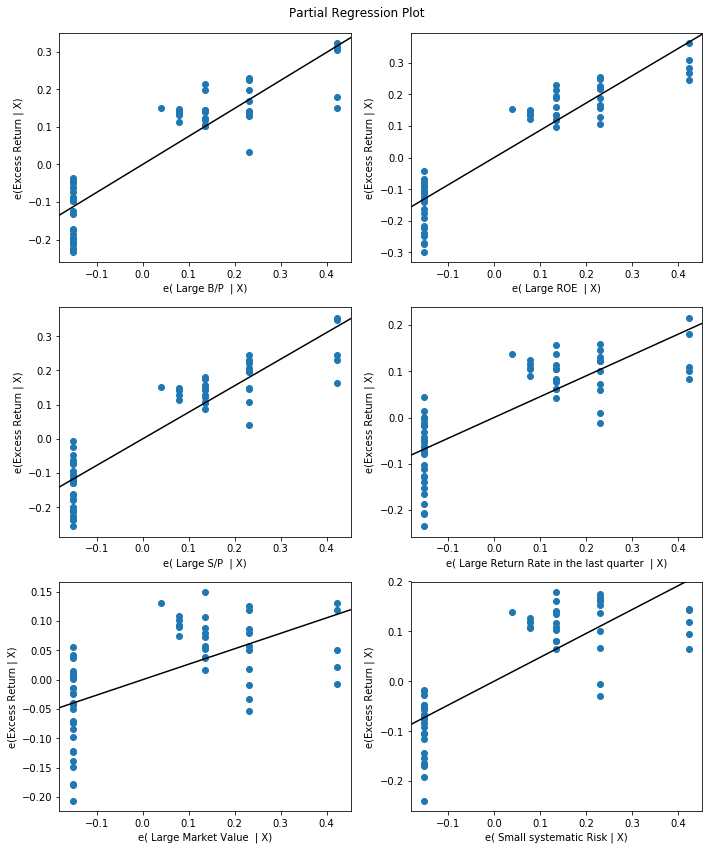

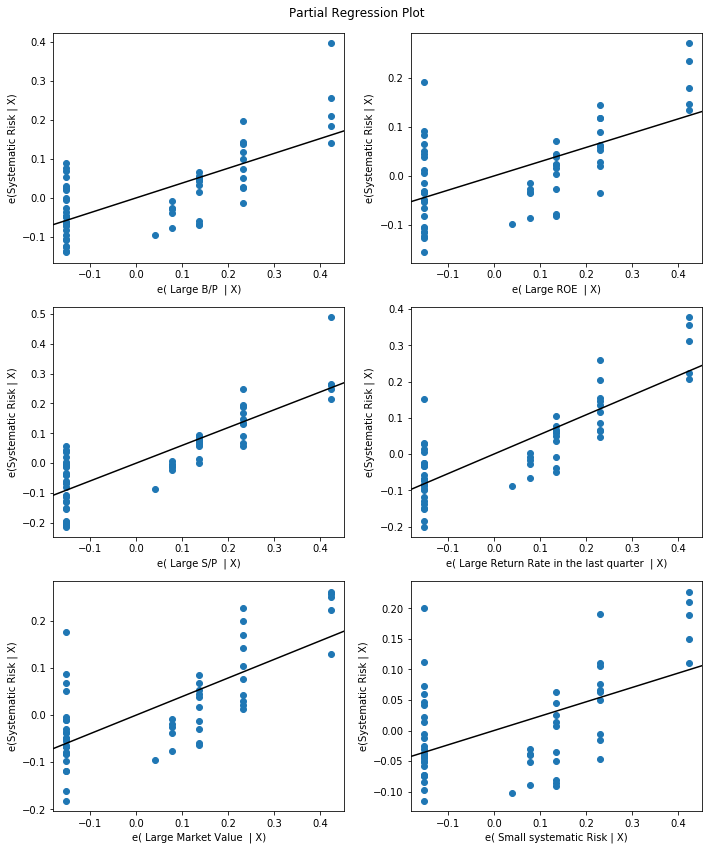

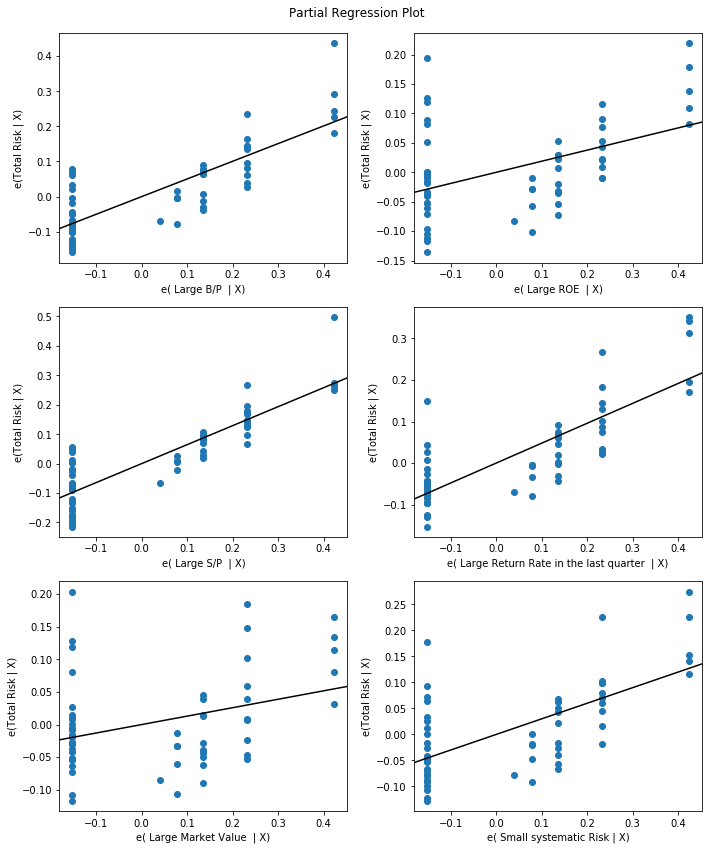

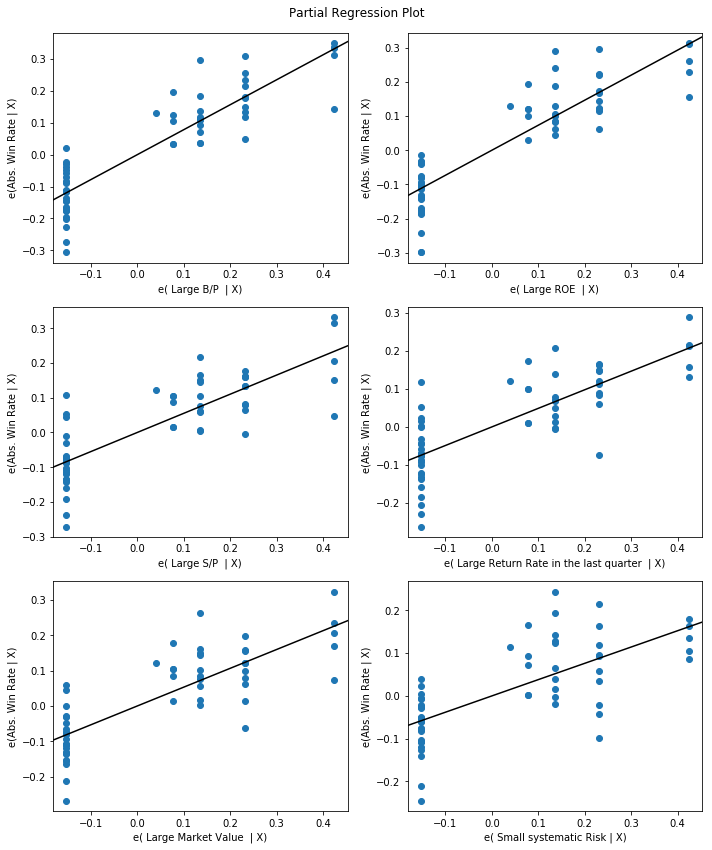

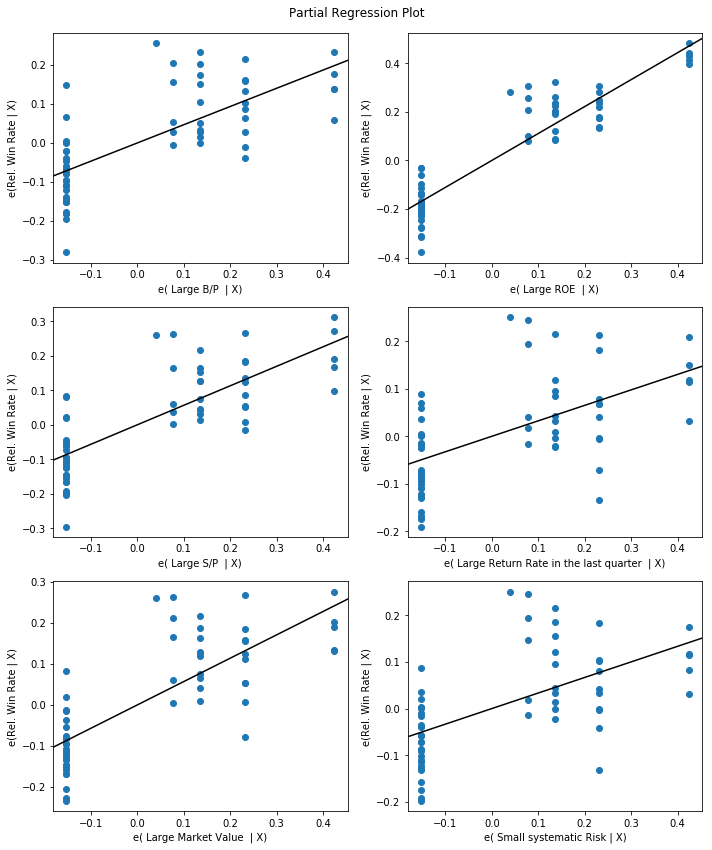

In [118]:
for y in y_o.keys():
    model_ols = sm.OLS(y_o[y],x_o).fit()
    fig = plt.figure(figsize=(10,12))
    fig = sm.graphics.plot_partregress_grid(model_ols, fig=fig)

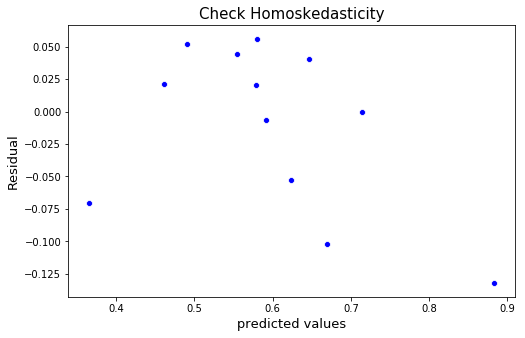

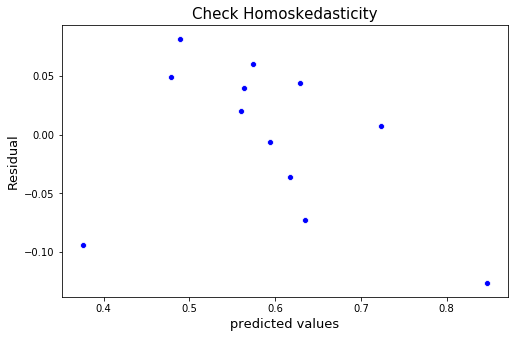

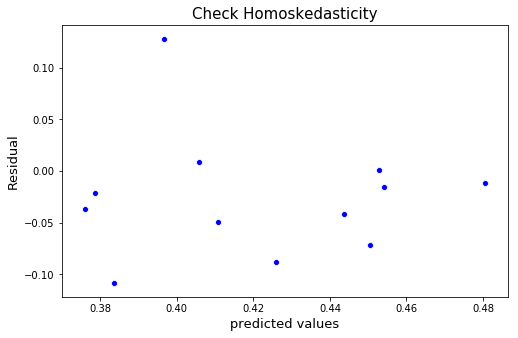

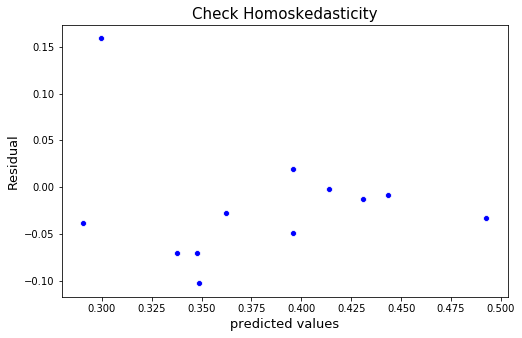

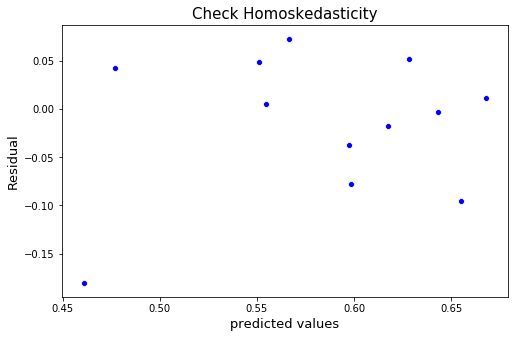

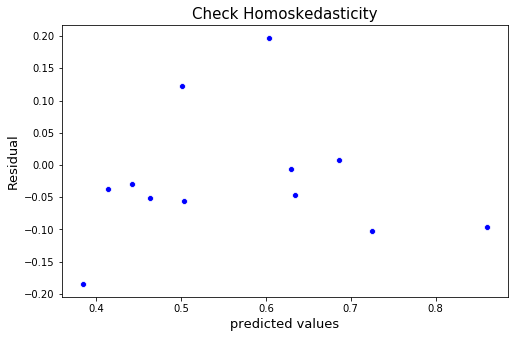

In [119]:
error_list=[]
for y in y_o.keys():
    error = y_o_test[y] - Y_o_pred[y]
    error_info = pd.DataFrame({'y_true': y_o_test[y], 'y_pred': Y_o_pred[y], 'error': error}, columns=['y_true', 'y_pred', 'error'])
    error_list.append(error_info)
    plt.figure(figsize=(8,5))
    g = sns.scatterplot(x="y_pred", y="error", data=error_info, color='blue')
    g.set_title('Check Homoskedasticity', fontsize=15)
    g.set_xlabel("predicted values", fontsize=13)
    g.set_ylabel("Residual", fontsize=13)

1.6215799780769184
1.6819424442764341
1.1953060659793757
1.215215373547569
2.2147484787943914
2.1946702508706504


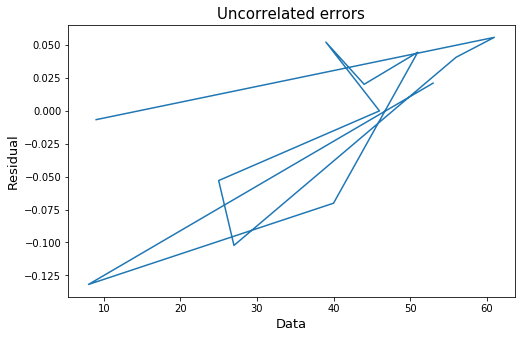

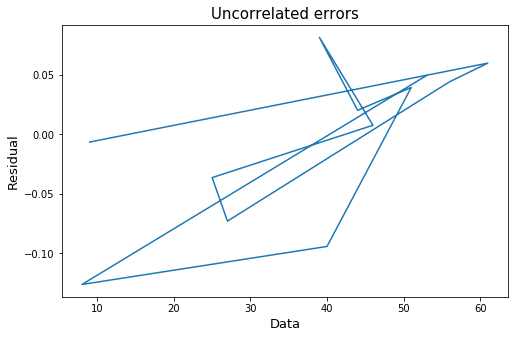

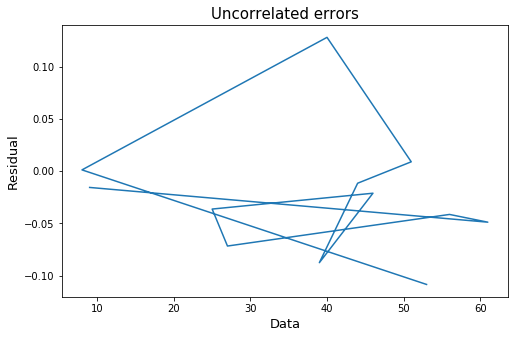

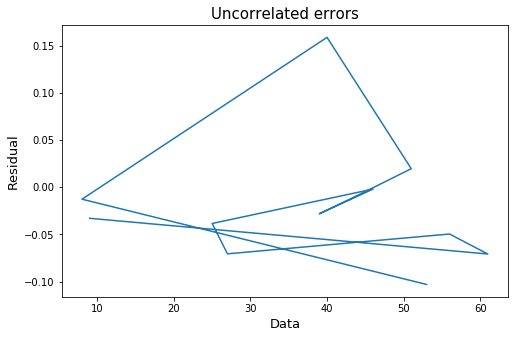

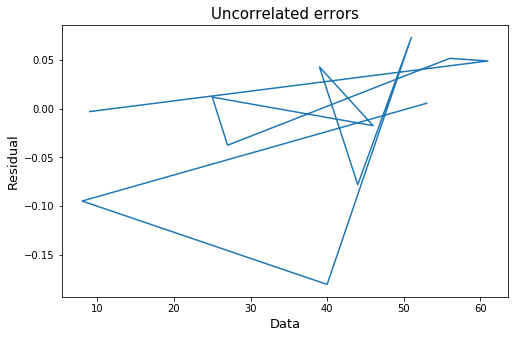

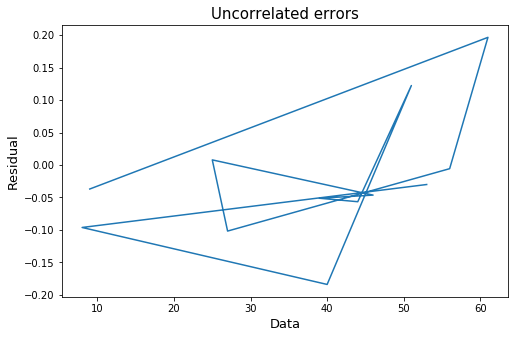

In [120]:
for error in error_list: 
        fig, ax = plt.subplots(figsize=(8,5))
        ax = error.error.plot()
        dw=durbin_watson(error.error,axis=0)
        print(dw)
        ax.set_title('Uncorrelated errors', fontsize=15)
        ax.set_xlabel("Data", fontsize=13)
        ax.set_ylabel("Residual", fontsize=13)

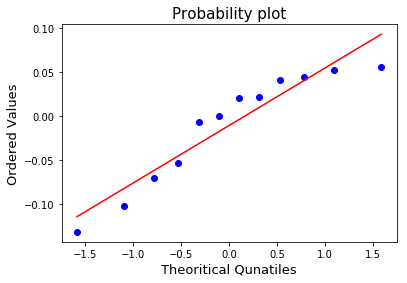

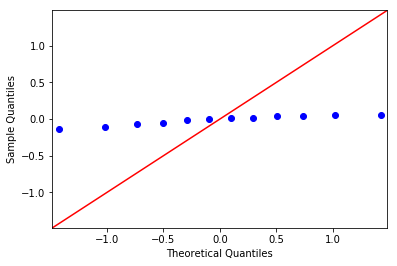

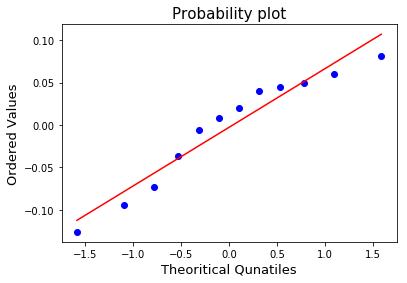

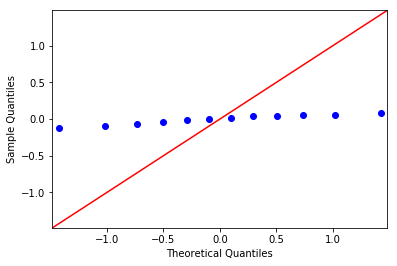

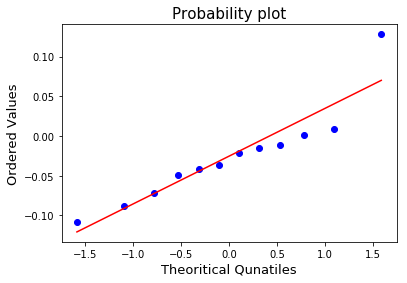

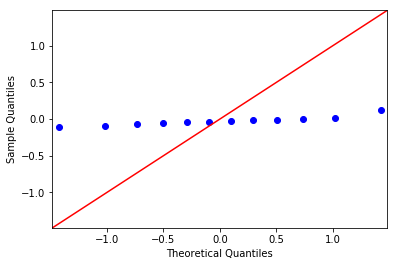

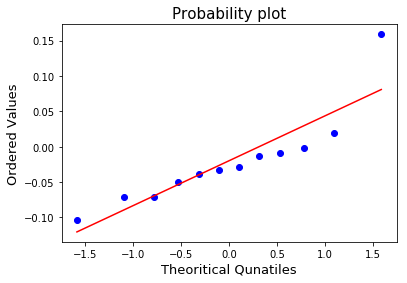

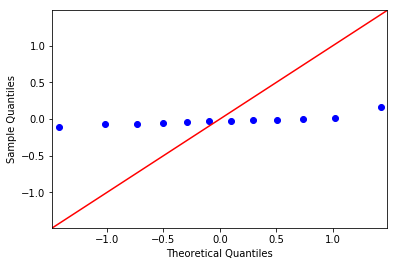

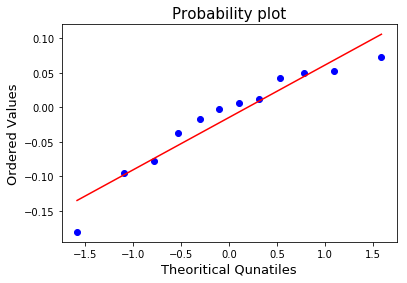

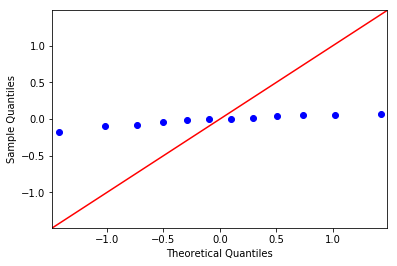

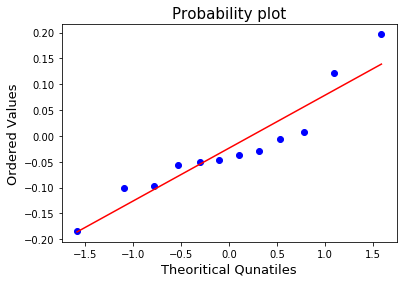

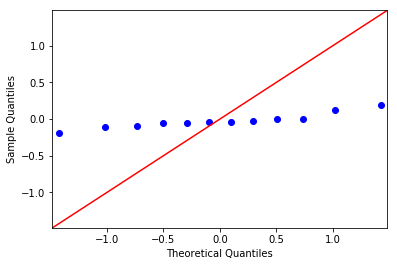

In [121]:
for error in error_list:
    fig, ax = plt.subplots(figsize=(6,4))
    _ = sp.stats.probplot(error.error, plot=ax, fit=True)
    ax.set_title('Probability plot', fontsize=15)
    ax.set_xlabel("Theoritical Qunatiles", fontsize=13)
    ax.set_ylabel("Ordered Values", fontsize=13)
    ax = sm.qqplot(error.error, line='45')
    plt.show()

In [122]:

for y in Y_o_pred.keys():
    r_squared = coefficient_of_determination(y_o_test[y],Y_o_pred[y])
   
    print(r_squared)

0.7019488999882291
0.6717835969280928
0.08145662584081781
0.3066319230322627
0.504528490561185
0.6624426054758185


In [123]:
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2,random_state=1)
Y_1_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
for y in y_o_train.keys():
    svm_reg=svm.SVR()
    svm_reg.fit(x_o_train, y_o_train[y])
    y_1_pred = svm_reg.predict(x_o_test)
    Y_1_pred[y]= y_1_pred
    r_squared = coefficient_of_determination(y_o_test[y],Y_1_pred[y])
    print(r_squared)

0.7465984312631406
0.6886520125888618
0.1901121673612045
0.22679892209499797
0.29685924368806216
0.5149808779610382


c:\users\neeharika\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\neeharika\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\neeharika\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

In [124]:
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2,random_state=1)
Y_2_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
for y in y_o_train.keys():
    model_ridge=linear_model.Ridge()
    model_ridge.fit(x_o_train, y_o_train[y])
    y_2_pred = model_ridge.predict(x_o_test)
    Y_2_pred[y]= y_2_pred
    r_squared = coefficient_of_determination(y_o_test[y],Y_2_pred[y])
    print(r_squared)
    
    

0.6820985240720776
0.6253733924696872
0.10330142587087077
0.2973510983894222
0.35404679945997375
0.47951105741502786


In [125]:
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2,random_state=1)
Y_3_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
for y in y_o_train.keys():
    model_Lasso=linear_model.Lasso()
    model_Lasso.fit(x_o_train, y_o_train[y])
    y_3_pred = model_Lasso.predict(x_o_test)
    Y_3_pred[y]= y_3_pred
    r_squared = coefficient_of_determination(y_o_test[y],Y_3_pred[y])
    print(r_squared)

-0.011684970903171665
-0.00765139607725418
-0.03401965128322515
-0.04904605125656869
-0.010455567388474751
-0.011701761356112117


In [127]:
y_o = df_o.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_o=df_o.drop(['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'],axis=1)
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o, y_o,test_size=0.2,random_state=1)
Y_4_pred=pd.DataFrame(columns=['Annual Return', 'Excess Return','Systematic Risk', 'Total Risk', 'Abs. Win Rate','Rel. Win Rate'])
for y in y_o_train.keys():
    dec = tree.DecisionTreeRegressor(max_depth=6)
    dec.fit(x_o_train, y_o_train[y])
    y_4_pred = dec.predict(x_o_test)
    Y_4_pred[y]= y_4_pred
    r_squared = coefficient_of_determination(y_o_test[y],Y_4_pred[y])
    print(r_squared)

    
    

0.05819553784468945
-0.08843178190751999
-1.272687738136772
0.1258997546772398
0.47603833865814704
0.580750893921335
